### Fetching the data

In [4359]:
import pandas as pd
import numpy as np
import ast
import seaborn as sns
import matplotlib.pyplot as plt

In [4360]:
file_path='/Users/gyauk/github/Project1_movie_analysis/Project1/data/raw/movies_08-04-2025_10-27-01.csv'

df=pd.read_csv(file_path)
df.head()

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,origin_country,original_language,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,credits
0,False,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",356000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",https://www.marvel.com/movies/avengers-endgame,299534,tt4154796,['US'],en,...,2799439100,181,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Avenge the fallen.,Avengers: Endgame,False,8.238,26200,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
1,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",https://www.avatar.com/movies/avatar,19995,tt0499549,['US'],en,...,2923706026,162,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Enter the world of Pandora.,Avatar,False,7.587,32104,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
2,False,/k6EOrckWFuz7I4z4wiRwz8zsj4H.jpg,"{'id': 10, 'name': 'Star Wars Collection', 'po...",245000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.starwars.com/films/star-wars-episod...,140607,tt2488496,['US'],en,...,2068223624,136,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Every generation has a story.,Star Wars: The Force Awakens,False,7.262,19661,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
3,False,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",https://www.marvel.com/movies/avengers-infinit...,299536,tt4154756,['US'],en,...,2052415039,149,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Destiny arrives all the same.,Avengers: Infinity War,False,8.236,30380,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
4,False,/sCzcYW9h55WcesOqA12cgEr9Exw.jpg,NaN,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",https://www.paramountmovies.com/movies/titanic,597,tt0120338,['US'],en,...,2264162353,194,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Nothing on Earth could come between them.,Titanic,False,7.905,25862,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."


In [4361]:
df.columns.to_list()


['adult',
 'backdrop_path',
 'belongs_to_collection',
 'budget',
 'genres',
 'homepage',
 'id',
 'imdb_id',
 'origin_country',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'video',
 'vote_average',
 'vote_count',
 'credits']

## Data Preparation & Cleaning

### Drop Irrelevant Columns

In [4362]:
df= df.drop(columns =['adult', 'imdb_id', 'original_title', 'video', 'homepage'])
df.head()

,backdrop_path,belongs_to_collection,budget,genres,id,origin_country,original_language,overview,popularity,poster_path,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,credits
0,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",356000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",299534,['US'],en,After the devastating events of Avengers: Infi...,22.6136,/ulzhLuWrPK07P1YkdWQLZnQh1JL.jpg,...,2019-04-24,2799439100,181,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Avenge the fallen.,Avengers: Endgame,8.238,26200,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
1,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",19995,['US'],en,"In the 22nd century, a paraplegic Marine is di...",33.5372,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,...,2009-12-15,2923706026,162,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Enter the world of Pandora.,Avatar,7.587,32104,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
2,/k6EOrckWFuz7I4z4wiRwz8zsj4H.jpg,"{'id': 10, 'name': 'Star Wars Collection', 'po...",245000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",140607,['US'],en,Thirty years after defeating the Galactic Empi...,13.3565,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,...,2015-12-15,2068223624,136,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Every generation has a story.,Star Wars: The Force Awakens,7.262,19661,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
3,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",299536,['US'],en,As the Avengers and their allies have continue...,35.5559,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,...,2018-04-25,2052415039,149,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Destiny arrives all the same.,Avengers: Infinity War,8.236,30380,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
4,/sCzcYW9h55WcesOqA12cgEr9Exw.jpg,NaN,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",597,['US'],en,101-year-old Rose DeWitt Bukater tells the sto...,32.0193,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,...,1997-11-18,2264162353,194,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Nothing on Earth could come between them.,Titanic,7.905,25862,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."


In [4363]:
print(df['belongs_to_collection'][5])
df['production_countries'][10]


{'id': 328, 'name': 'Jurassic Park Collection', 'poster_path': '/qIm2nHXLpBBdMxi8dvfrnDkBUDh.jpg', 'backdrop_path': '/njFixYzIxX8jsn6KMSEtAzi4avi.jpg'}


"[{'iso_3166_1': 'US', 'name': 'United States of America'}]"

In [4364]:
print(type(df['production_countries'][0]))

for col in df.columns:
    print(f"{col}: {type(df[col].iloc[0])}")


# x=df['belongs_to_collection'][5]

# type(x)

<class 'str'>
backdrop_path: <class 'str'>
belongs_to_collection: <class 'str'>
budget: <class 'numpy.int64'>
genres: <class 'str'>
id: <class 'numpy.int64'>
origin_country: <class 'str'>
original_language: <class 'str'>
overview: <class 'str'>
popularity: <class 'numpy.float64'>
poster_path: <class 'str'>
production_companies: <class 'str'>
production_countries: <class 'str'>
release_date: <class 'str'>
revenue: <class 'numpy.int64'>
runtime: <class 'numpy.int64'>
spoken_languages: <class 'str'>
status: <class 'str'>
tagline: <class 'str'>
title: <class 'str'>
vote_average: <class 'numpy.float64'>
vote_count: <class 'numpy.int64'>
credits: <class 'str'>


### Evaluate JSON Like column

In [4365]:
import ast

def evaluate_json_column(column):
    try:
        return ast.literal_eval(column) if pd.notna(column) else {}
    except (ValueError, SyntaxError):
        return {}

json_columns = ['belongs_to_collection', 'genres', 'production_countries', 
                'production_companies', 'spoken_languages','credits']

for col in json_columns:
    df[col] = df[col].apply(evaluate_json_column)


df.head()

,backdrop_path,belongs_to_collection,budget,genres,id,origin_country,original_language,overview,popularity,poster_path,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,credits
0,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",356000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",299534,['US'],en,After the devastating events of Avengers: Infi...,22.6136,/ulzhLuWrPK07P1YkdWQLZnQh1JL.jpg,...,2019-04-24,2799439100,181,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Avenge the fallen.,Avengers: Endgame,8.238,26200,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
1,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",19995,['US'],en,"In the 22nd century, a paraplegic Marine is di...",33.5372,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,...,2009-12-15,2923706026,162,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Enter the world of Pandora.,Avatar,7.587,32104,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
2,/k6EOrckWFuz7I4z4wiRwz8zsj4H.jpg,"{'id': 10, 'name': 'Star Wars Collection', 'po...",245000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",140607,['US'],en,Thirty years after defeating the Galactic Empi...,13.3565,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,...,2015-12-15,2068223624,136,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Every generation has a story.,Star Wars: The Force Awakens,7.262,19661,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
3,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",299536,['US'],en,As the Avengers and their allies have continue...,35.5559,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,...,2018-04-25,2052415039,149,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Destiny arrives all the same.,Avengers: Infinity War,8.236,30380,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
4,/sCzcYW9h55WcesOqA12cgEr9Exw.jpg,{},200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",597,['US'],en,101-year-old Rose DeWitt Bukater tells the sto...,32.0193,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,...,1997-11-18,2264162353,194,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Nothing on Earth could come between them.,Titanic,7.905,25862,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."


In [4366]:
type(df['production_countries'][0])

list

In [4367]:
type(df['credits'][0])


dict

In [4368]:
x=df['belongs_to_collection'][5]

type(x)

dict

In [4369]:
df['genres'][5]

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 878, 'name': 'Science Fiction'},
 {'id': 53, 'name': 'Thriller'}]

In [4370]:
for col in df.columns:
    print(f"{col}: {type(df[col].iloc[0])}")

backdrop_path: <class 'str'>
belongs_to_collection: <class 'dict'>
budget: <class 'numpy.int64'>
genres: <class 'list'>
id: <class 'numpy.int64'>
origin_country: <class 'str'>
original_language: <class 'str'>
overview: <class 'str'>
popularity: <class 'numpy.float64'>
poster_path: <class 'str'>
production_companies: <class 'list'>
production_countries: <class 'list'>
release_date: <class 'str'>
revenue: <class 'numpy.int64'>
runtime: <class 'numpy.int64'>
spoken_languages: <class 'list'>
status: <class 'str'>
tagline: <class 'str'>
title: <class 'str'>
vote_average: <class 'numpy.float64'>
vote_count: <class 'numpy.int64'>
credits: <class 'dict'>


### Extract and clean key data points

In [4371]:
def extract_collection_name(value):
    try:
        if pd.notnull(value) and isinstance(value, dict):
            return value.get('name')
    except (ValueError, SyntaxError):
        return None
    # return None

# Apply to the column
df['collection_name'] = df['belongs_to_collection'].apply(extract_collection_name)


In [4372]:
df['collection_name'][0]

'The Avengers Collection'

In [4373]:
def break_data_points(df, init_column, new_column):
  df[new_column] = df[init_column].apply(lambda x: ' | '.join(d['name'] for d in x) 
                  if isinstance(x, list) else None)
  return df
      
    
break_data_points(df,'genres','genre_names')


,backdrop_path,belongs_to_collection,budget,genres,id,origin_country,original_language,overview,popularity,poster_path,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,credits,collection_name,genre_names
0,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",356000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",299534,['US'],en,After the devastating events of Avengers: Infi...,22.6136,/ulzhLuWrPK07P1YkdWQLZnQh1JL.jpg,...,181,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Avenge the fallen.,Avengers: Endgame,8.238,26200,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",The Avengers Collection,Adventure | Science Fiction | Action
1,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",19995,['US'],en,"In the 22nd century, a paraplegic Marine is di...",33.5372,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,...,162,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Enter the world of Pandora.,Avatar,7.587,32104,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",Avatar Collection,Action | Adventure | Fantasy | Science Fiction
2,/k6EOrckWFuz7I4z4wiRwz8zsj4H.jpg,"{'id': 10, 'name': 'Star Wars Collection', 'po...",245000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",140607,['US'],en,Thirty years after defeating the Galactic Empi...,13.3565,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,...,136,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Every generation has a story.,Star Wars: The Force Awakens,7.262,19661,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",Star Wars Collection,Adventure | Action | Science Fiction
3,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",299536,['US'],en,As the Avengers and their allies have continue...,35.5559,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,...,149,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Destiny arrives all the same.,Avengers: Infinity War,8.236,30380,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",The Avengers Collection,Adventure | Action | Science Fiction
4,/sCzcYW9h55WcesOqA12cgEr9Exw.jpg,{},200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",597,['US'],en,101-year-old Rose DeWitt Bukater tells the sto...,32.0193,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,...,194,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Nothing on Earth could come between them.,Titanic,7.905,25862,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",None,Drama | Romance
5,/aIGIYJTyOkEVUmEd3z5x6diYsFx.jpg,"{'id': 328, 'name': 'Jurassic Park Collection'...",150000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",135397,['US'],en,Twenty-two years after the events of Jurassic ...,16.0248,/rhr4y79GpxQF9IsfJItRXVaoGs4.jpg,...,124,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The park is open.,Jurassic World,6.692,20620,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",Jurassic Park Collection,Action | Adventure | Science Fiction | Thriller
6,/1TUg5pO1VZ4B0Q1amk3OlXvlpXV.jpg,"{'id': 762512, 'name': 'The Lion King (Reboot)...",260000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",420818,['US'],en,"Simba idolizes his father, King Mufasa, and ta...",22.6761,/dzBtMocZuJbjLOXvrl4zGYigDzh.jpg,...,118,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The king has returned.,The Lion King,7.110,10299,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",The Lion King (Reboot) Collection,Adventure | Drama | Family | Animation
7,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",24428,['US'],en,When an unexpected enemy emerges and threatens...,35.3602,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,...,143,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,7.734,31498,"

In [4374]:
break_data_points(df, 'production_countries', 'cld_production_countries')
break_data_points(df, 'production_companies', 'cld_production_companies')
break_data_points(df, 'spoken_languages', 'original_language')


,backdrop_path,belongs_to_collection,budget,genres,id,origin_country,original_language,overview,popularity,poster_path,...,status,tagline,title,vote_average,vote_count,credits,collection_name,genre_names,cld_production_countries,cld_production_companies
0,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",356000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",299534,['US'],English | 日本語 |,After the devastating events of Avengers: Infi...,22.6136,/ulzhLuWrPK07P1YkdWQLZnQh1JL.jpg,...,Released,Avenge the fallen.,Avengers: Endgame,8.238,26200,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",The Avengers Collection,Adventure | Science Fiction | Action,United States of America,Marvel Studios
1,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",19995,['US'],English | Español,"In the 22nd century, a paraplegic Marine is di...",33.5372,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,...,Released,Enter the world of Pandora.,Avatar,7.587,32104,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",Avatar Collection,Action | Adventure | Fantasy | Science Fiction,United States of America | United Kingdom,Dune Entertainment | Lightstorm Entertainment ...
2,/k6EOrckWFuz7I4z4wiRwz8zsj4H.jpg,"{'id': 10, 'name': 'Star Wars Collection', 'po...",245000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",140607,['US'],English,Thirty years after defeating the Galactic Empi...,13.3565,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,...,Released,Every generation has a story.,Star Wars: The Force Awakens,7.262,19661,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",Star Wars Collection,Adventure | Action | Science Fiction,United States of America,Lucasfilm Ltd. | Bad Robot
3,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",299536,['US'],English |,As the Avengers and their allies have continue...,35.5559,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,...,Released,Destiny arrives all the same.,Avengers: Infinity War,8.236,30380,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",The Avengers Collection,Adventure | Action | Science Fiction,United States of America,Marvel Studios
4,/sCzcYW9h55WcesOqA12cgEr9Exw.jpg,{},200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",597,['US'],English | Français | Deutsch | svenska | Itali...,101-year-old Rose DeWitt Bukater tells the sto...,32.0193,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,...,Released,Nothing on Earth could come between them.,Titanic,7.905,25862,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",None,Drama | Romance,United States of America,Paramount Pictures | 20th Century Fox | Lights...
5,/aIGIYJTyOkEVUmEd3z5x6diYsFx.jpg,"{'id': 328, 'name': 'Jurassic Park Collection'...",150000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",135397,['US'],English,Twenty-two years after the events of Jurassic ...,16.0248,/rhr4y79GpxQF9IsfJItRXVaoGs4.jpg,...,Released,The park is open.,Jurassic World,6.692,20620,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",Jurassic Park Collection,Action | Adventure | Science Fiction | Thriller,United States of America,Amblin Entertainment | Universal Pictures
6,/1TUg5pO1VZ4B0Q1amk3OlXvlpXV.jpg,"{'id': 762512, 'name': 'The Lion King (Reboot)...",260000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",420818,['US'],English,"Simba idolizes his father, King Mufasa, and ta...",22.6761,/dzBtMocZuJbjLOXvrl4zGYigDzh.jpg,...,Released,The king has returned.,The Lion King,7.110,10299,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",The Lion King (Reboot) Collection,Adventure | Drama | Family | Animation,United States of America,Walt Disney Pictures | Fairview Entertainment
7,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",24428,['US'],English | हिन्दी | Pусский,When an unexpected

In [4375]:
df['credits'][0]

{'cast': [{'adult': False,
   'gender': 2,
   'id': 3223,
   'known_for_department': 'Acting',
   'name': 'Robert Downey Jr.',
   'original_name': 'Robert Downey Jr.',
   'popularity': 12.0526,
   'profile_path': '/5qHNjhtjMD4YWH3UP0rm4tKwxCL.jpg',
   'cast_id': 493,
   'character': 'Tony Stark / Iron Man',
   'credit_id': '5e85cd735294e700134abf26',
   'order': 0},
  {'adult': False,
   'gender': 2,
   'id': 16828,
   'known_for_department': 'Acting',
   'name': 'Chris Evans',
   'original_name': 'Chris Evans',
   'popularity': 10.0808,
   'profile_path': '/3bOGNsHlrswhyW79uvIHH1V43JI.jpg',
   'cast_id': 494,
   'character': 'Steve Rogers / Captain America',
   'credit_id': '5e85cd84691cd50018593984',
   'order': 1},
  {'adult': False,
   'gender': 2,
   'id': 103,
   'known_for_department': 'Acting',
   'name': 'Mark Ruffalo',
   'original_name': 'Mark Ruffalo',
   'popularity': 4.9001,
   'profile_path': '/5GilHMOt5PAQh6rlUKZzGmaKEI7.jpg',
   'cast_id': 594,
   'character': 'Bruce B

In [4376]:
# Function to extract cast names
def extract_cast_names(credits):
    return [member['name'] for member in credits.get('cast', [])]

# Function to extract crew names
def extract_crew_names(credits):
    return [member['name'] for member in credits.get('crew', [])]

# Function to extract director
def extract_director(credits):
    for member in credits.get('crew', []):
        if member.get('job') == 'Director':
            return member.get('name')
    return None

# Extract and add new columns
df['cast'] = df['credits'].apply(lambda x: ' | '.join(extract_cast_names(x)))
df['crew'] = df['credits'].apply(lambda x: ' | '.join(extract_crew_names(x)))
df['director'] = df['credits'].apply(extract_director)
df['cast_size'] = df['credits'].apply(lambda x: len(x.get('cast', [])))
df['crew_size'] = df['credits'].apply(lambda x: len(x.get('crew', [])))


In [4377]:
df.head()

,backdrop_path,belongs_to_collection,budget,genres,id,origin_country,original_language,overview,popularity,poster_path,...,credits,collection_name,genre_names,cld_production_countries,cld_production_companies,cast,crew,director,cast_size,crew_size
0,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",356000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",299534,['US'],English | 日本語 |,After the devastating events of Avengers: Infi...,22.6136,/ulzhLuWrPK07P1YkdWQLZnQh1JL.jpg,...,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",The Avengers Collection,Adventure | Science Fiction | Action,United States of America,Marvel Studios,Robert Downey Jr. | Chris Evans | Mark Ruffalo...,Paul Schneider | Louis D'Esposito | Carlos Pac...,Joe Russo,105,593
1,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",19995,['US'],English | Español,"In the 22nd century, a paraplegic Marine is di...",33.5372,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,...,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",Avatar Collection,Action | Adventure | Fantasy | Science Fiction,United States of America | United Kingdom,Dune Entertainment | Lightstorm Entertainment ...,Sam Worthington | Zoe Saldaña | Sigourney Weav...,James Cameron | James Cameron | Ilram Choi | W...,James Cameron,65,986
2,/k6EOrckWFuz7I4z4wiRwz8zsj4H.jpg,"{'id': 10, 'name': 'Star Wars Collection', 'po...",245000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",140607,['US'],English,Thirty years after defeating the Galactic Empi...,13.3565,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,...,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",Star Wars Collection,Adventure | Action | Science Fiction,United States of America,Lucasfilm Ltd. | Bad Robot,Harrison Ford | Mark Hamill | Carrie Fisher | ...,Ron Jones | J.J. Abrams | Bryan Burk | J.J. Ab...,J.J. Abrams,182,257
3,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",299536,['US'],English |,As the Avengers and their allies have continue...,35.5559,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,...,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",The Avengers Collection,Adventure | Action | Science Fiction,United States of America,Marvel Studios,Robert Downey Jr. | Chris Evans | Chris Hemswo...,Paul Schneider | John David Duncan | Janeshia ...,Anthony Russo,69,724
4,/sCzcYW9h55WcesOqA12cgEr9Exw.jpg,{},200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",597,['US'],English | Français | Deutsch | svenska | Itali...,101-year-old Rose DeWitt Bukater tells the sto...,32.0193,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,...,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",None,Drama | Romance,United States of America,Paramount Pictures | 20th Century Fox | Lights...,Leonardo DiCaprio | Kate Winslet | Billy Zane ...,Martin Laing | Russell Carpenter | James Camer...,James Cameron,116,258


### Identify Anomalies with value_count()

In [4378]:
def get_value_counts(df, column):
    return df[column].value_counts()
    

In [4379]:
get_value_counts(df, 'genre_names')

Adventure | Action | Science Fiction                 3
Action | Adventure | Science Fiction | Thriller      2
Action | Adventure | Science Fiction                 2
Adventure | Science Fiction | Action                 1
Action | Adventure | Fantasy | Science Fiction       1
Drama | Romance                                      1
Adventure | Drama | Family | Animation               1
Science Fiction | Action | Adventure                 1
Action | Thriller | Crime                            1
Fantasy | Adventure                                  1
Family | Animation | Adventure | Comedy | Fantasy    1
Animation | Family | Adventure | Fantasy             1
Family | Fantasy | Romance                           1
Action | Adventure | Animation | Family              1
Name: genre_names, dtype: int64

In [4380]:
get_value_counts(df, 'cld_production_countries')

United States of America                     16
United States of America | United Kingdom     1
United Kingdom | United States of America     1
Name: cld_production_countries, dtype: int64

In [4381]:
get_value_counts(df, 'original_language')

English                                                        9
English | 日本語 |                                                1
English | Español                                              1
English |                                                      1
English | Français | Deutsch | svenska | Italiano | Pусский    1
English | हिन्दी | Pусский                                     1
العربية | English | Español | ภาษาไทย                          1
English | 한국어/조선말 | Kiswahili |                                1
English | Pусский                                              1
English | Français                                             1
Name: original_language, dtype: int64

In [4382]:
def normalize_anomalies(genre_string):
    genres = [g.strip() for g in genre_string.split('|')]
    sorted_genres = sorted(genres)
    return ' | '.join(sorted_genres)

df['genre_names']= df['genre_names'].apply(normalize_anomalies)
df['cld_production_countries']= df['cld_production_countries'].apply(normalize_anomalies)
df['cld_production_companies']= df['cld_production_companies'].apply(normalize_anomalies)
df['original_language']= df['original_language'].apply(normalize_anomalies)



In [4383]:
df['genre_names'].value_counts()
df['cld_production_countries'].value_counts()
df['cld_production_companies'].value_counts()
df['original_language'].value_counts()


English                                                        9
 | English | 日本語                                               1
English | Español                                              1
 | English                                                     1
Deutsch | English | Français | Italiano | Pусский | svenska    1
English | Pусский | हिन्दी                                     1
English | Español | العربية | ภาษาไทย                          1
 | English | Kiswahili | 한국어/조선말                               1
English | Pусский                                              1
English | Français                                             1
Name: original_language, dtype: int64

### Handling Missing & Incorrect Data

In [4384]:
def convert_to_numeric(df,column):
         df[column] = pd.to_numeric(df[column],errors='coerce')
         return df.info()

In [4385]:
# columns = ['id','budget','popularity']
convert_to_numeric(df, 'id')
convert_to_numeric(df, 'popularity')
convert_to_numeric(df,'budget')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   backdrop_path             18 non-null     object 
 1   belongs_to_collection     18 non-null     object 
 2   budget                    18 non-null     int64  
 3   genres                    18 non-null     object 
 4   id                        18 non-null     int64  
 5   origin_country            18 non-null     object 
 6   original_language         18 non-null     object 
 7   overview                  18 non-null     object 
 8   popularity                18 non-null     float64
 9   poster_path               18 non-null     object 
 10  production_companies      18 non-null     object 
 11  production_countries      18 non-null     object 
 12  release_date              18 non-null     object 
 13  revenue                   18 non-null     int64  
 14  runtime     

In [4386]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   backdrop_path             18 non-null     object 
 1   belongs_to_collection     18 non-null     object 
 2   budget                    18 non-null     int64  
 3   genres                    18 non-null     object 
 4   id                        18 non-null     int64  
 5   origin_country            18 non-null     object 
 6   original_language         18 non-null     object 
 7   overview                  18 non-null     object 
 8   popularity                18 non-null     float64
 9   poster_path               18 non-null     object 
 10  production_companies      18 non-null     object 
 11  production_countries      18 non-null     object 
 12  release_date              18 non-null     object 
 13  revenue                   18 non-null     int64  
 14  runtime     

In [4387]:
def convert_to_datetime(df,column):
         df[column] = pd.to_datetime(df[column])
         return df[column].info()

In [4388]:
convert_to_datetime(df,'release_date')

<class 'pandas.core.series.Series'>
RangeIndex: 18 entries, 0 to 17
Series name: release_date
Non-Null Count  Dtype         
--------------  -----         
18 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 272.0 bytes


In [4389]:
df['release_date'][0]

Timestamp('2019-04-24 00:00:00')

In [4390]:
df['budget'][0]

356000000

### Replace unrealistic values:

In [4391]:
def check_zero_in_column(df, column):

    if (df[column] == 0).any():
        print(f"Column '{column}' contains at least one value equal to 0.")
    else:
        print(f"No zero values found in column '{column}'.")
        

check_zero_in_column(df, 'budget')
check_zero_in_column(df, 'revenue')
check_zero_in_column(df, 'runtime')


No zero values found in column 'budget'.
No zero values found in column 'revenue'.
No zero values found in column 'runtime'.


- Convert Budget and Revenue to Million USD

In [4392]:
df['budget_musd'] = df['budget'] / 1_000_000
df['revenue_musd'] = df['revenue']/ 1_000_000
df['revenue_musd'] = df['revenue_musd'].round(2)
df.drop(columns= ['budget','revenue'], inplace= True)
df.head()

,backdrop_path,belongs_to_collection,genres,id,origin_country,original_language,overview,popularity,poster_path,production_companies,...,genre_names,cld_production_countries,cld_production_companies,cast,crew,director,cast_size,crew_size,budget_musd,revenue_musd
0,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,"{'id': 86311, 'name': 'The Avengers Collection...","[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",299534,['US'],| English | 日本語,After the devastating events of Avengers: Infi...,22.6136,/ulzhLuWrPK07P1YkdWQLZnQh1JL.jpg,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...",...,Action | Adventure | Science Fiction,United States of America,Marvel Studios,Robert Downey Jr. | Chris Evans | Mark Ruffalo...,Paul Schneider | Louis D'Esposito | Carlos Pac...,Joe Russo,105,593,356.0,2799.44
1,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,"{'id': 87096, 'name': 'Avatar Collection', 'po...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",19995,['US'],English | Español,"In the 22nd century, a paraplegic Marine is di...",33.5372,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,"[{'id': 444, 'logo_path': None, 'name': 'Dune ...",...,Action | Adventure | Fantasy | Science Fiction,United Kingdom | United States of America,20th Century Fox | Dune Entertainment | Ingeni...,Sam Worthington | Zoe Saldaña | Sigourney Weav...,James Cameron | James Cameron | Ilram Choi | W...,James Cameron,65,986,237.0,2923.71
2,/k6EOrckWFuz7I4z4wiRwz8zsj4H.jpg,"{'id': 10, 'name': 'Star Wars Collection', 'po...","[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",140607,['US'],English,Thirty years after defeating the Galactic Empi...,13.3565,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,"[{'id': 1, 'logo_path': '/tlVSws0RvvtPBwViUyOF...",...,Action | Adventure | Science Fiction,United States of America,Bad Robot | Lucasfilm Ltd.,Harrison Ford | Mark Hamill | Carrie Fisher | ...,Ron Jones | J.J. Abrams | Bryan Burk | J.J. Ab...,J.J. Abrams,182,257,245.0,2068.22
3,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,"{'id': 86311, 'name': 'The Avengers Collection...","[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",299536,['US'],| English,As the Avengers and their allies have continue...,35.5559,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...",...,Action | Adventure | Science Fiction,United States of America,Marvel Studios,Robert Downey Jr. | Chris Evans | Chris Hemswo...,Paul Schneider | John David Duncan | Janeshia ...,Anthony Russo,69,724,300.0,2052.42
4,/sCzcYW9h55WcesOqA12cgEr9Exw.jpg,{},"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",597,['US'],Deutsch | English | Français | Italiano | Pусс...,101-year-old Rose DeWitt Bukater tells the sto...,32.0193,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,"[{'id': 4, 'logo_path': '/gz66EfNoYPqHTYI4q9UE...",...,Drama | Romance,United States of America,20th Century Fox | Lightstorm Entertainment | ...,Leonardo DiCaprio | Kate Winslet | Billy Zane ...,Martin Laing | Russell Carpenter | James Camer...,James Cameron,116,258,200.0,2264.16


In [4393]:
# df.columns
df['vote_count'][0]

26200

In [4394]:
def vote_count_zero(df, column):
    return df[df[column]==0]
        
vote_count_zero(df, 'vote_count')


,backdrop_path,belongs_to_collection,genres,id,origin_country,original_language,overview,popularity,poster_path,production_companies,...,genre_names,cld_production_countries,cld_production_companies,cast,crew,director,cast_size,crew_size,budget_musd,revenue_musd


In [4395]:
df['tagline'].nunique()

18

In [4396]:
df['overview'].nunique()


18

In [4397]:
def check_for_nodata(df, column):
    return df[df[column]==0]
        
check_for_nodata(df, 'overview')
check_for_nodata(df, 'tagline')


,backdrop_path,belongs_to_collection,genres,id,origin_country,original_language,overview,popularity,poster_path,production_companies,...,genre_names,cld_production_countries,cld_production_companies,cast,crew,director,cast_size,crew_size,budget_musd,revenue_musd


In [4398]:
df_str = df.applymap(lambda x: str(x) if isinstance(x, (dict, list)) else x)
duplicates = df_str.duplicated()
duplicates

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
dtype: bool

In [4399]:
def released_movie(df, status_column):
    df_new=df[df[status_column] == 'Released']
    df.drop(columns=['status'], inplace=True)
    return df_new.head()
    

In [4400]:
released_movie(df,'status')

,backdrop_path,belongs_to_collection,genres,id,origin_country,original_language,overview,popularity,poster_path,production_companies,...,genre_names,cld_production_countries,cld_production_companies,cast,crew,director,cast_size,crew_size,budget_musd,revenue_musd
0,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,"{'id': 86311, 'name': 'The Avengers Collection...","[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",299534,['US'],| English | 日本語,After the devastating events of Avengers: Infi...,22.6136,/ulzhLuWrPK07P1YkdWQLZnQh1JL.jpg,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...",...,Action | Adventure | Science Fiction,United States of America,Marvel Studios,Robert Downey Jr. | Chris Evans | Mark Ruffalo...,Paul Schneider | Louis D'Esposito | Carlos Pac...,Joe Russo,105,593,356.0,2799.44
1,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,"{'id': 87096, 'name': 'Avatar Collection', 'po...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",19995,['US'],English | Español,"In the 22nd century, a paraplegic Marine is di...",33.5372,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,"[{'id': 444, 'logo_path': None, 'name': 'Dune ...",...,Action | Adventure | Fantasy | Science Fiction,United Kingdom | United States of America,20th Century Fox | Dune Entertainment | Ingeni...,Sam Worthington | Zoe Saldaña | Sigourney Weav...,James Cameron | James Cameron | Ilram Choi | W...,James Cameron,65,986,237.0,2923.71
2,/k6EOrckWFuz7I4z4wiRwz8zsj4H.jpg,"{'id': 10, 'name': 'Star Wars Collection', 'po...","[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",140607,['US'],English,Thirty years after defeating the Galactic Empi...,13.3565,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,"[{'id': 1, 'logo_path': '/tlVSws0RvvtPBwViUyOF...",...,Action | Adventure | Science Fiction,United States of America,Bad Robot | Lucasfilm Ltd.,Harrison Ford | Mark Hamill | Carrie Fisher | ...,Ron Jones | J.J. Abrams | Bryan Burk | J.J. Ab...,J.J. Abrams,182,257,245.0,2068.22
3,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,"{'id': 86311, 'name': 'The Avengers Collection...","[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",299536,['US'],| English,As the Avengers and their allies have continue...,35.5559,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...",...,Action | Adventure | Science Fiction,United States of America,Marvel Studios,Robert Downey Jr. | Chris Evans | Chris Hemswo...,Paul Schneider | John David Duncan | Janeshia ...,Anthony Russo,69,724,300.0,2052.42
4,/sCzcYW9h55WcesOqA12cgEr9Exw.jpg,{},"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",597,['US'],Deutsch | English | Français | Italiano | Pусс...,101-year-old Rose DeWitt Bukater tells the sto...,32.0193,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,"[{'id': 4, 'logo_path': '/gz66EfNoYPqHTYI4q9UE...",...,Drama | Romance,United States of America,20th Century Fox | Lightstorm Entertainment | ...,Leonardo DiCaprio | Kate Winslet | Billy Zane ...,Martin Laing | Russell Carpenter | James Camer...,James Cameron,116,258,200.0,2264.16


In [4401]:
# # Step 1: Remove duplicates
# df.drop_duplicates(inplace=True)

# # Step 2: Drop rows where 'id' or 'title' is NaN or an empty string
# df = df[
#     df['id'].notna() & (df['id'].astype(str).str.strip() != '') &
#     df['title'].notna() & (df['title'].str.strip() != '')
# ]
df.columns


Index(['backdrop_path', 'belongs_to_collection', 'genres', 'id',
       'origin_country', 'original_language', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'runtime', 'spoken_languages', 'tagline', 'title',
       'vote_average', 'vote_count', 'credits', 'collection_name',
       'genre_names', 'cld_production_countries', 'cld_production_companies',
       'cast', 'crew', 'director', 'cast_size', 'crew_size', 'budget_musd',
       'revenue_musd'],
      dtype='object')

In [4402]:
# List of columns to appear first
new_order =['id', 'title', 'tagline', 'release_date', 'genres', 'belongs_to_collection', 
            'original_language', 'budget_musd', 'revenue_musd', 'production_companies', 'production_countries', 
            'vote_count', 'vote_average', 'popularity', 'runtime', 'overview',
            'spoken_languages', 'poster_path', 'cast', 'cast_size', 'director', 'crew_size']

# # Reorder DataFrame
# df = df[new_order + [col for col in df.columns if col != new_order]]
reordered_df = df[new_order + [col for col in df.columns if col not in new_order]]


In [4403]:
reordered_df.reset_index(drop=True)

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,director,crew_size,backdrop_path,origin_country,credits,collection_name,genre_names,cld_production_countries,cld_production_companies,crew
0,299534,Avengers: Endgame,Avenge the fallen.,2019-04-24,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...","{'id': 86311, 'name': 'The Avengers Collection...",| English | 日本語,356.0,2799.44,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...",...,Joe Russo,593,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,['US'],"{'cast': [{'adult': False, 'gender': 2, 'id': ...",The Avengers Collection,Action | Adventure | Science Fiction,United States of America,Marvel Studios,Paul Schneider | Louis D'Esposito | Carlos Pac...
1,19995,Avatar,Enter the world of Pandora.,2009-12-15,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","{'id': 87096, 'name': 'Avatar Collection', 'po...",English | Español,237.0,2923.71,"[{'id': 444, 'logo_path': None, 'name': 'Dune ...",...,James Cameron,986,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,['US'],"{'cast': [{'adult': False, 'gender': 2, 'id': ...",Avatar Collection,Action | Adventure | Fantasy | Science Fiction,United Kingdom | United States of America,20th Century Fox | Dune Entertainment | Ingeni...,James Cameron | James Cameron | Ilram Choi | W...
2,140607,Star Wars: The Force Awakens,Every generation has a story.,2015-12-15,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...","{'id': 10, 'name': 'Star Wars Collection', 'po...",English,245.0,2068.22,"[{'id': 1, 'logo_path': '/tlVSws0RvvtPBwViUyOF...",...,J.J. Abrams,257,/k6EOrckWFuz7I4z4wiRwz8zsj4H.jpg,['US'],"{'cast': [{'adult': False, 'gender': 2, 'id': ...",Star Wars Collection,Action | Adventure | Science Fiction,United States of America,Bad Robot | Lucasfilm Ltd.,Ron Jones | J.J. Abrams | Bryan Burk | J.J. Ab...
3,299536,Avengers: Infinity War,Destiny arrives all the same.,2018-04-25,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...","{'id': 86311, 'name': 'The Avengers Collection...",| English,300.0,2052.42,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...",...,Anthony Russo,724,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,['US'],"{'cast': [{'adult': False, 'gender': 2, 'id': ...",The Avengers Collection,Action | Adventure | Science Fiction,United States of America,Marvel Studios,Paul Schneider | John David Duncan | Janeshia ...
4,597,Titanic,Nothing on Earth could come between them.,1997-11-18,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",{},Deutsch | English | Français | Italiano | Pусс...,200.0,2264.16,"[{'id': 4, 'logo_path': '/gz66EfNoYPqHTYI4q9UE...",...,James Cameron,258,/sCzcYW9h55WcesOqA12cgEr9Exw.jpg,['US'],"{'cast': [{'adult': False, 'gender': 2, 'id': ...",None,Drama | Romance,United States of America,20th Century Fox | Lightstorm Entertainment | ...,Martin Laing | Russell Carpenter | James Camer...
5,135397,Jurassic World,The park is open.,2015-06-06,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","{'id': 328, 'name': 'Jurassic Park Collection'...",English,150.0,1671.54,"[{'id': 56, 'logo_path': '/cEaxANEisCqeEoRvODv...",...,Colin Trevorrow,423,/aIGIYJTyOkEVUmEd3z5x6diYsFx.jpg,['US'],"{'cast': [{'adult': False, 'gender': 2, 'id': ...",Jurassic Park Collection,Action | Adventure | Science Fiction | Thriller,United States of America,Amblin Entertainment | Universal Pictures,Satoshi Yamazaki | Robert Consing | Michael Cr...
6,420818,The Lion King,The king has returned.,2019-07-12,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...","{'id': 762512, 'name': 'The Lion King (Reboot)...",English,260.0,1662.02,"[{'id': 2, 'logo_path': '/wdrCwmRnLFJhEoH8GSfy...",...,Jon Favreau,44,/1TUg5pO1VZ4B0Q1amk3OlXvlpXV.jpg,['US'],"{'cast': [{'adult': False, 'gender': 2, 'id': ...",The Lion King (Reboot) Collection,Adventure | Animation | Drama | Family,United States of America,Fairview Entertainment | Walt Disney Pictures,Hans Zimmer | Jeremy Wayne | Hans Zimmer | Kim...
7,24428,The Avengers,Some assembly required.

In [4404]:
reordered_df.to_csv(f"/Users/gyauk/github/Project1_movie_analysis/Project1/data/processed/movies.csv", index=False)

In [4405]:
reordered_df.head()

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,director,crew_size,backdrop_path,origin_country,credits,collection_name,genre_names,cld_production_countries,cld_production_companies,crew
0,299534,Avengers: Endgame,Avenge the fallen.,2019-04-24,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...","{'id': 86311, 'name': 'The Avengers Collection...",| English | 日本語,356.0,2799.44,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...",...,Joe Russo,593,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,['US'],"{'cast': [{'adult': False, 'gender': 2, 'id': ...",The Avengers Collection,Action | Adventure | Science Fiction,United States of America,Marvel Studios,Paul Schneider | Louis D'Esposito | Carlos Pac...
1,19995,Avatar,Enter the world of Pandora.,2009-12-15,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","{'id': 87096, 'name': 'Avatar Collection', 'po...",English | Español,237.0,2923.71,"[{'id': 444, 'logo_path': None, 'name': 'Dune ...",...,James Cameron,986,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,['US'],"{'cast': [{'adult': False, 'gender': 2, 'id': ...",Avatar Collection,Action | Adventure | Fantasy | Science Fiction,United Kingdom | United States of America,20th Century Fox | Dune Entertainment | Ingeni...,James Cameron | James Cameron | Ilram Choi | W...
2,140607,Star Wars: The Force Awakens,Every generation has a story.,2015-12-15,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...","{'id': 10, 'name': 'Star Wars Collection', 'po...",English,245.0,2068.22,"[{'id': 1, 'logo_path': '/tlVSws0RvvtPBwViUyOF...",...,J.J. Abrams,257,/k6EOrckWFuz7I4z4wiRwz8zsj4H.jpg,['US'],"{'cast': [{'adult': False, 'gender': 2, 'id': ...",Star Wars Collection,Action | Adventure | Science Fiction,United States of America,Bad Robot | Lucasfilm Ltd.,Ron Jones | J.J. Abrams | Bryan Burk | J.J. Ab...
3,299536,Avengers: Infinity War,Destiny arrives all the same.,2018-04-25,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...","{'id': 86311, 'name': 'The Avengers Collection...",| English,300.0,2052.42,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...",...,Anthony Russo,724,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,['US'],"{'cast': [{'adult': False, 'gender': 2, 'id': ...",The Avengers Collection,Action | Adventure | Science Fiction,United States of America,Marvel Studios,Paul Schneider | John David Duncan | Janeshia ...
4,597,Titanic,Nothing on Earth could come between them.,1997-11-18,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",{},Deutsch | English | Français | Italiano | Pусс...,200.0,2264.16,"[{'id': 4, 'logo_path': '/gz66EfNoYPqHTYI4q9UE...",...,James Cameron,258,/sCzcYW9h55WcesOqA12cgEr9Exw.jpg,['US'],"{'cast': [{'adult': False, 'gender': 2, 'id': ...",None,Drama | Romance,United States of America,20th Century Fox | Lightstorm Entertainment | ...,Martin Laing | Russell Carpenter | James Camer...


In [4406]:
reordered_df.columns

Index(['id', 'title', 'tagline', 'release_date', 'genres',
       'belongs_to_collection', 'original_language', 'budget_musd',
       'revenue_musd', 'production_companies', 'production_countries',
       'vote_count', 'vote_average', 'popularity', 'runtime', 'overview',
       'spoken_languages', 'poster_path', 'cast', 'cast_size', 'director',
       'crew_size', 'backdrop_path', 'origin_country', 'credits',
       'collection_name', 'genre_names', 'cld_production_countries',
       'cld_production_companies', 'crew'],
      dtype='object')

### KPI Implementation & Analysis

- highest revenue

In [4407]:
def highest_revenue_movie(title,revenue_column):
    max_row = reordered_df.loc[reordered_df[revenue_column].idxmax()]
    return print(f'{max_row[title]} generated the most revenue of USD {max_row[revenue_column]}')

highest_revenue_movie('title','revenue_musd')
   

Avatar generated the most revenue of USD 2923.71


- Highest Budget

In [4408]:
def highest_budget_movie(title,budget_column):
    # Find the row with the maximum revenue
    max_row = reordered_df.loc[reordered_df[budget_column].idxmax()]
    return print(f'{max_row[title]} had the highest budget of USD {max_row[budget_column]}')

highest_budget_movie('title','revenue_musd')

Avatar had the highest budget of USD 2923.71


- Highest Profit (Revenue - Budget)



In [4409]:
def highest_profit_movie(title,revenue_column,budget_column,profit_column):
    # find the highest profiting movie is difference b/n revenue-budget
     # Calculate profit and assign to new column profit
    reordered_df['profit'] = reordered_df[revenue_column] - reordered_df[budget_column]

    # Find the row with the highest profit
    highest_profit_row = reordered_df.loc[reordered_df[profit_column].idxmax()]
    
    return print(f'{highest_profit_row[title]} had the highest profit of USD {highest_profit_row[profit_column]}') 

highest_profit_movie('title','revenue_musd','budget_musd','profit')


Avatar had the highest profit of USD 2686.71


/var/folders/4r/wjm49txx4vj1j_kryh7ps6r00000gn/T/ipykernel_53279/1735934887.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reordered_df['profit'] = reordered_df[revenue_column] - reordered_df[budget_column]


- Lowest Profit (Revenue - Budget)


In [4410]:
def lowest_profit_movie(title,revenue_column,budget_column,profit_column):
    # find the highest revenue-budget
     # Calculate profit
    # reordered_df['low_profit'] =  reordered_df[budget_column]-reordered_df[revenue_column] 

    # Find the row with the highest profit
    lowest_profit_row = reordered_df.loc[reordered_df[profit_column].idxmin()]
    return print(f'{lowest_profit_row[title]} had the highest profit of USD {lowest_profit_row[profit_column]}') 
    
lowest_profit_movie('title','revenue_musd','budget_musd','profit')


Avengers: Age of Ultron had the highest profit of USD 1040.4


- Highest ROI (Revenue / Budget) (only movies with Budget ≥ 10M) o Lowest ROI (only movies with Budget ≥ 10M)


In [4411]:
def highest_roi(title,revenue_column,budget_column,roi_column):
     df_roi_range = reordered_df[reordered_df[budget_column] >= 100]
      # Calculate roi and plcae in roi column
     df_roi_range['roi'] =  df_roi_range[revenue_column] / df_roi_range[budget_column]

    # Find the row with the highest roi
     highest_roi = df_roi_range.loc[df_roi_range[roi_column].idxmax()]
    
     return print(f'{highest_roi[title]} had the highest profit of USD {highest_roi[roi_column]}') 
highest_roi('title','revenue_musd','budget_musd','roi')



Avatar had the highest profit of USD 12.336329113924052


- lowest ROI

In [4412]:
def lowest_roi(title,revenue_column,budget_column,roi_column): 
      df_roi_range = reordered_df[reordered_df[budget_column] >= 100]    

      df_roi_range['roi'] =  df_roi_range[revenue_column] / df_roi_range[budget_column]

    # Find the row with the highest profit
      lowest_ROI = df_roi_range.loc[df_roi_range['roi'].idxmin()]
      return print(f'{lowest_ROI[title]} had the lowest roi of {lowest_ROI[roi_column]}')
    
lowest_roi('title','revenue_musd','budget_musd','roi')


Avengers: Age of Ultron had the lowest roi of 3.85041095890411


- Most Voted Movie

In [4413]:
def most_voted(title,vote_column): 
    most_voted_df=reordered_df.loc[reordered_df[vote_column].idxmax()]
    
    return print(f'{most_voted_df[title]} was the most voted movie with {most_voted_df[vote_column]} votes.')

most_voted('title','vote_count')

Avatar was the most voted movie with 32104 votes.


- Highest Rated Movie

In [4414]:
def highest_rated(title,vote_column,vote_average):
     df_rated_range = reordered_df[reordered_df[vote_column] >= 10]
     highest_rated_movie_df = df_rated_range.loc[df_rated_range[vote_average].idxmax()]    
     return print(f'{highest_rated_movie_df[title]} was the most highest rated movie with {highest_rated_movie_df[vote_average]} ratings.')

highest_rated('title','vote_count','vote_average')


Avengers: Endgame was the most highest rated movie with 8.238 ratings.


- Lowest Rated Movie

In [4415]:
def lowest_rated(title,vote_column,vote_average):
     df_rated_range = reordered_df[reordered_df[vote_column] >= 10]
     lowest_rated_movie_df = df_rated_range.loc[df_rated_range[vote_average].idxmin()]
     return print(f'{lowest_rated_movie_df[title]} was the lowest rated movie with {lowest_rated_movie_df[vote_average]} ratings.')
     
lowest_rated('title','vote_count','vote_average')    

Jurassic World: Fallen Kingdom was the lowest rated movie with 6.538 ratings.


- Most Popular

In [4416]:
def most_popular(title,popular_column):
   mostpopular_df= reordered_df.loc[reordered_df[popular_column].idxmax()]
   return print(f'{mostpopular_df[title]} was the most popular movie with popularity of {mostpopular_df[popular_column]}')

most_popular('title','popularity')    


Avengers: Infinity War was the most popular movie with popularity of 35.5559


### Advanced Movie Filtering & Search Queries

- Search 1: Find the best-rated Science Fiction Action movies starring Bruce Willis (sorted by Rating - highest to lowest)

In [4417]:
#filter by science fiction first 
specific_genres = ['Science Fiction', 'Action']
filtered_genre_df = reordered_df[reordered_df['genres'].apply(lambda genres: any(genre['name'] in specific_genres for genre in genres))]
filtered_genre_df

#fileter by actor bruce willis
filter_actor_df=filtered_genre_df[filtered_genre_df['cast'].apply(lambda cast: 'Bruce Willis' in cast)]
filter_actor_df

# Sort by the 'vote_average' column (rating) in descending order
sorted_movies = filter_actor_df.sort_values(by='vote_average', ascending=False)

# Select relevant columns to display
best_rated_movies = sorted_movies[['id', 'title', 'vote_average', 'cast', 'genres']]

# Display the best-rated movies
print(best_rated_movies)

Empty DataFrame
Columns: [id, title, vote_average, cast, genres]
Index: []


- Search 2: Find movies starring Uma Thurman, directed by Quentin Tarantino (sorted by runtime - shortest to longest).

### Franchise vs. Standalone Movie Performance

In [4418]:
# Create a new column to identify franchise vs standalone
reordered_df['is_franchise'] = reordered_df['collection_name'].notna()

# Group by franchise status and calculate mean revenue
mean_revenue_comparison = reordered_df.groupby('is_franchise')['revenue_musd'].mean().reset_index()

# Rename columns for clarity
mean_revenue_comparison.columns = ['Is_Franchise', 'Mean_Revenue_musd']

#Converting true/false to proper labels
mean_revenue_comparison['Is_Franchise'] = mean_revenue_comparison['Is_Franchise'].map({
    True: 'Franchise', 
    False: 'Standalone'
})


mean_revenue_comparison

/var/folders/4r/wjm49txx4vj1j_kryh7ps6r00000gn/T/ipykernel_53279/4033983013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reordered_df['is_franchise'] = reordered_df['collection_name'].notna()


,Is_Franchise,Mean_Revenue_musd
0,Standalone,1765.140000
1,Franchise,1682.643125


In [4419]:
reordered_df['roi'] =  reordered_df['revenue_musd'] / reordered_df['budget_musd']
# reordered_df['roi']
# Group by franchise status and calculate mean revenue
median_roi_comparison = reordered_df.groupby('is_franchise')['roi'].median().reset_index()

# Rename columns for clarity
median_roi_comparison.columns = ['Is_Franchise', 'median_roi']

# Optional: Convert True/False to readable labels
median_roi_comparison['Is_Franchise'] = median_roi_comparison['Is_Franchise'].map({
    True: 'Franchise', 
    False: 'Standalone'
})

median_roi_comparison

/var/folders/4r/wjm49txx4vj1j_kryh7ps6r00000gn/T/ipykernel_53279/2515425740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reordered_df['roi'] =  reordered_df['revenue_musd'] / reordered_df['budget_musd']


,Is_Franchise,median_roi
0,Standalone,9.617025
1,Franchise,7.786121


mean budget raised

Mean Popularity

In [4420]:
# Create a new column to identify franchise vs standalone
reordered_df['is_franchise'] = reordered_df['collection_name'].notna()

# Group by franchise status and calculate mean revenue
mean_popularity_comparison = reordered_df.groupby('is_franchise')['popularity'].mean().reset_index()

# Rename columns for clarity
mean_popularity_comparison.columns = ['Is_Franchise', 'Mean_popularity']

# Optional: Convert True/False to readable labels
mean_popularity_comparison['Is_Franchise'] = mean_popularity_comparison['Is_Franchise'].map({
    True: 'Franchise', 
    False: 'Standalone'
})

mean_popularity_comparison

/var/folders/4r/wjm49txx4vj1j_kryh7ps6r00000gn/T/ipykernel_53279/464965242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reordered_df['is_franchise'] = reordered_df['collection_name'].notna()


,Is_Franchise,Mean_popularity
0,Standalone,25.055400
1,Franchise,20.331431


Mean rating

In [4421]:
# Create a new column to identify franchise vs standalone
reordered_df['is_franchise'] = reordered_df['collection_name'].notna()

# Group by franchise status and calculate mean revenue
mean_popularity_comparison = reordered_df.groupby('is_franchise')['popularity'].mean().reset_index()

# Rename columns for clarity
mean_popularity_comparison.columns = ['Is_Franchise', 'Mean_popularity']

# Optional: Convert True/False to readable labels
mean_popularity_comparison['Is_Franchise'] = mean_popularity_comparison['Is_Franchise'].map({
    True: 'Franchise', 
    False: 'Standalone'
})

# Display result
mean_popularity_comparison

/var/folders/4r/wjm49txx4vj1j_kryh7ps6r00000gn/T/ipykernel_53279/3263194741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reordered_df['is_franchise'] = reordered_df['collection_name'].notna()


,Is_Franchise,Mean_popularity
0,Standalone,25.055400
1,Franchise,20.331431


-   mean rating

In [4422]:
# Create a new column to identify franchise vs standalone
reordered_df['is_franchise'] = reordered_df['collection_name'].notna()

# Group by franchise status and calculate mean revenue
mean_rating_comparison = reordered_df.groupby('is_franchise')['vote_average'].mean().reset_index()

# Rename columns for clarity
mean_rating_comparison.columns = ['Is_Franchise', 'Mean_vote_average']

# Optional: Convert True/False to readable labels
mean_rating_comparison['Is_Franchise'] = mean_rating_comparison['Is_Franchise'].map({
    True: 'Franchise', 
    False: 'Standalone'
})

# Display result
mean_rating_comparison

/var/folders/4r/wjm49txx4vj1j_kryh7ps6r00000gn/T/ipykernel_53279/1375667859.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reordered_df['is_franchise'] = reordered_df['collection_name'].notna()


,Is_Franchise,Mean_vote_average
0,Standalone,7.452500
1,Franchise,7.378625


### Most Successful Franchises & Directors

In [4423]:
franchise_counts = reordered_df['collection_name'].value_counts()
print('Most successful franchise is', franchise_counts.idxmax(),'with',franchise_counts.max(),'movies in a franchise')

Most successful franchise is The Avengers Collection with 4 movies in a franchise


In [4424]:
# Rename columns for clarity
# total_budget.columns = ['Collection_name', 'total_budget_musd']

# # Optional: Convert True/False to readable labels
# total_budget['Is_Franchise'] = total_budget['Is_Franchise'].map({
#     True: 'Franchise', 
#     False: 'Standalone'
# })

# Display result
print(total_budget)

                       Collection_name  total_budget_musd
0                    Avatar Collection              237.0
1             Black Panther Collection              200.0
2                    Frozen Collection              300.0
3              Harry Potter Collection              125.0
4             Jurassic Park Collection              320.0
5                 Star Wars Collection              445.0
6              The Avengers Collection             1241.0
7  The Fast and the Furious Collection              190.0
8           The Incredibles Collection              200.0
9    The Lion King (Reboot) Collection              260.0


In [4425]:
Franchise_df= reordered_df.groupby('collection_name')
Franchise_df.head()

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,origin_country,credits,collection_name,genre_names,cld_production_countries,cld_production_companies,crew,profit,is_franchise,roi
0,299534,Avengers: Endgame,Avenge the fallen.,2019-04-24,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...","{'id': 86311, 'name': 'The Avengers Collection...",| English | 日本語,356.0,2799.44,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...",...,['US'],"{'cast': [{'adult': False, 'gender': 2, 'id': ...",The Avengers Collection,Action | Adventure | Science Fiction,United States of America,Marvel Studios,Paul Schneider | Louis D'Esposito | Carlos Pac...,2443.44,True,7.863596
1,19995,Avatar,Enter the world of Pandora.,2009-12-15,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","{'id': 87096, 'name': 'Avatar Collection', 'po...",English | Español,237.0,2923.71,"[{'id': 444, 'logo_path': None, 'name': 'Dune ...",...,['US'],"{'cast': [{'adult': False, 'gender': 2, 'id': ...",Avatar Collection,Action | Adventure | Fantasy | Science Fiction,United Kingdom | United States of America,20th Century Fox | Dune Entertainment | Ingeni...,James Cameron | James Cameron | Ilram Choi | W...,2686.71,True,12.336329
2,140607,Star Wars: The Force Awakens,Every generation has a story.,2015-12-15,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...","{'id': 10, 'name': 'Star Wars Collection', 'po...",English,245.0,2068.22,"[{'id': 1, 'logo_path': '/tlVSws0RvvtPBwViUyOF...",...,['US'],"{'cast': [{'adult': False, 'gender': 2, 'id': ...",Star Wars Collection,Action | Adventure | Science Fiction,United States of America,Bad Robot | Lucasfilm Ltd.,Ron Jones | J.J. Abrams | Bryan Burk | J.J. Ab...,1823.22,True,8.441714
3,299536,Avengers: Infinity War,Destiny arrives all the same.,2018-04-25,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...","{'id': 86311, 'name': 'The Avengers Collection...",| English,300.0,2052.42,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...",...,['US'],"{'cast': [{'adult': False, 'gender': 2, 'id': ...",The Avengers Collection,Action | Adventure | Science Fiction,United States of America,Marvel Studios,Paul Schneider | John David Duncan | Janeshia ...,1752.42,True,6.841400
5,135397,Jurassic World,The park is open.,2015-06-06,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","{'id': 328, 'name': 'Jurassic Park Collection'...",English,150.0,1671.54,"[{'id': 56, 'logo_path': '/cEaxANEisCqeEoRvODv...",...,['US'],"{'cast': [{'adult': False, 'gender': 2, 'id': ...",Jurassic Park Collection,Action | Adventure | Science Fiction | Thriller,United States of America,Amblin Entertainment | Universal Pictures,Satoshi Yamazaki | Robert Consing | Michael Cr...,1521.54,True,11.143600
6,420818,The Lion King,The king has returned.,2019-07-12,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...","{'id': 762512, 'name': 'The Lion King (Reboot)...",English,260.0,1662.02,"[{'id': 2, 'logo_path': '/wdrCwmRnLFJhEoH8GSfy...",...,['US'],"{'cast': [{'adult': False, 'gender': 2, 'id': ...",The Lion King (Reboot) Collection,Adventure | Animation | Drama | Family,United States of America,Fairview Entertainment | Walt Disney Pictures,Hans Zimmer | Jeremy Wayne | Hans Zimmer | Kim...,1402.02,True,6.392385
7,24428,The Avengers,Some assembly required.,2012-04-25,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...","{'id': 86311, 'name': 'The Avengers Collection...",English | Pусский | हिन्दी,220.0,1518.82,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...",...,['US'],"{'cast': [{'adult': False, 'gender': 2, 'id': ...",The Avengers Collection,Action | Adventure | Science Fiction,United States of America,Marvel Studios,Joss Whedon | Jon Favreau | Jeremy Latcham | L...,1298.82,True,6.903727
8,168259,Furious 7,Vengeance hits home.,2015-04-01,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...","{'id': 9485, 'name': 'The Fast and the Furious...",English | Español | العربية | ภาษาไทย,190.0,1515.40,"[{'id': 333, 'logo_

In [4426]:
franchise_summary = Franchise_df.agg(
    movie_count=('id', 'count'),
    total_budget=('budget_musd', 'sum'),
    mean_budget=('budget_musd', 'mean'),
    total_revenue=('revenue_musd', 'sum'),
    mean_revenue=('revenue_musd', 'mean'),
    mean_rating=('vote_average', 'mean')
    
    
).reset_index()


In [4427]:
franchise_summary

,collection_name,movie_count,total_budget,mean_budget,total_revenue,mean_revenue,mean_rating
0,Avatar Collection,1,237.0,237.00,2923.71,2923.710,7.58700
1,Black Panther Collection,1,200.0,200.00,1349.93,1349.930,7.37300
2,Frozen Collection,2,300.0,150.00,2727.90,1363.950,7.24800
3,Harry Potter Collection,1,125.0,125.00,1341.51,1341.510,8.08700
4,Jurassic Park Collection,2,320.0,160.00,2982.01,1491.005,6.61500
5,Star Wars Collection,2,445.0,222.50,3400.92,1700.460,7.02100
6,The Avengers Collection,4,1241.0,310.25,7776.08,1944.020,7.86975
7,The Fast and the Furious Collection,1,190.0,190.00,1515.40,1515.400,7.20000
8,The Incredibles Collection,1,200.0,200.00,1242.81,1242.810,7.45400
9,The Lion King (Reboot) Collection,1,260.0,260.00,1662.02,1662.020,7.11000


In [4428]:
franchise_summary.to_csv(f"/Users/gyauk/github/Project1_movie_analysis/Project1/data/processed/franchise.csv", index=False)


In [4429]:
def sort_most_successful_movieinfranchise(collection_name,column):
     x=franchise_summary.sort_values(column)
     #iloc to loc because it accesses a row by its index label
     return print(f"{x[collection_name].iloc[-1]} is the most sucessful movie franschise")

sort_most_successful_movieinfranchise('collection_name','movie_count')

The Avengers Collection is the most sucessful movie franschise


In [4430]:
def sort_total_budget(collection_name,column):
    x=franchise_summary.sort_values(column)
    return print(f"{x[collection_name].iloc[-1]} is the most sucessful movie franschise")



sort_total_budget('collection_name','total_budget')



The Avengers Collection is the most sucessful movie franschise


In [4431]:
def sort_mean_budget(collection_name,column):
    x=franchise_summary.sort_values(column)
    return print(f"{x[collection_name].iloc[-1]} is the most sucessful movie franschise")


sort_mean_budget('collection_name','mean_budget')



The Avengers Collection is the most sucessful movie franschise


In [4432]:
def sort_total_revenue(collection_name,column):
  x=franchise_summary.sort_values(column)
  return print(f"{x[collection_name].iloc[-1]} is the most sucessful movie franschise")


sort_total_revenue('collection_name','total_revenue')



The Avengers Collection is the most sucessful movie franschise


In [4433]:
def sort_mean_revenue(collection_name,column):
    x=franchise_summary.sort_values(column)
    return print(f"{x[collection_name].iloc[-1]} is the most sucessful movie franschise")

sort_total_budget('collection_name','mean_revenue')  

Avatar Collection is the most sucessful movie franschise


In [4434]:
def sort_mean_rating(collection_name,column):
    x=franchise_summary.sort_values(column)
    return print(f"{x[collection_name].iloc[-1]} is the most sucessful movie franschise")

sort_total_budget('collection_name','mean_rating')  

Harry Potter Collection is the most sucessful movie franschise


In [4435]:
franchise_budgets.head()

,collection_name,total_budget,mean_budget,movie_count
0,Avatar Collection,237.0,237.0,1
1,Black Panther Collection,200.0,200.0,1
2,Frozen Collection,300.0,150.0,2
3,Harry Potter Collection,125.0,125.0,1
4,Jurassic Park Collection,320.0,160.0,2


In [4436]:
Franchise_director_df= reordered_df.groupby('director')
Franchise_director_df.head()


,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,origin_country,credits,collection_name,genre_names,cld_production_countries,cld_production_companies,crew,profit,is_franchise,roi
0,299534,Avengers: Endgame,Avenge the fallen.,2019-04-24,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...","{'id': 86311, 'name': 'The Avengers Collection...",| English | 日本語,356.0,2799.44,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...",...,['US'],"{'cast': [{'adult': False, 'gender': 2, 'id': ...",The Avengers Collection,Action | Adventure | Science Fiction,United States of America,Marvel Studios,Paul Schneider | Louis D'Esposito | Carlos Pac...,2443.44,True,7.863596
1,19995,Avatar,Enter the world of Pandora.,2009-12-15,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","{'id': 87096, 'name': 'Avatar Collection', 'po...",English | Español,237.0,2923.71,"[{'id': 444, 'logo_path': None, 'name': 'Dune ...",...,['US'],"{'cast': [{'adult': False, 'gender': 2, 'id': ...",Avatar Collection,Action | Adventure | Fantasy | Science Fiction,United Kingdom | United States of America,20th Century Fox | Dune Entertainment | Ingeni...,James Cameron | James Cameron | Ilram Choi | W...,2686.71,True,12.336329
2,140607,Star Wars: The Force Awakens,Every generation has a story.,2015-12-15,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...","{'id': 10, 'name': 'Star Wars Collection', 'po...",English,245.0,2068.22,"[{'id': 1, 'logo_path': '/tlVSws0RvvtPBwViUyOF...",...,['US'],"{'cast': [{'adult': False, 'gender': 2, 'id': ...",Star Wars Collection,Action | Adventure | Science Fiction,United States of America,Bad Robot | Lucasfilm Ltd.,Ron Jones | J.J. Abrams | Bryan Burk | J.J. Ab...,1823.22,True,8.441714
3,299536,Avengers: Infinity War,Destiny arrives all the same.,2018-04-25,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...","{'id': 86311, 'name': 'The Avengers Collection...",| English,300.0,2052.42,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...",...,['US'],"{'cast': [{'adult': False, 'gender': 2, 'id': ...",The Avengers Collection,Action | Adventure | Science Fiction,United States of America,Marvel Studios,Paul Schneider | John David Duncan | Janeshia ...,1752.42,True,6.841400
4,597,Titanic,Nothing on Earth could come between them.,1997-11-18,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",{},Deutsch | English | Français | Italiano | Pусс...,200.0,2264.16,"[{'id': 4, 'logo_path': '/gz66EfNoYPqHTYI4q9UE...",...,['US'],"{'cast': [{'adult': False, 'gender': 2, 'id': ...",None,Drama | Romance,United States of America,20th Century Fox | Lightstorm Entertainment | ...,Martin Laing | Russell Carpenter | James Camer...,2064.16,False,11.320800
5,135397,Jurassic World,The park is open.,2015-06-06,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","{'id': 328, 'name': 'Jurassic Park Collection'...",English,150.0,1671.54,"[{'id': 56, 'logo_path': '/cEaxANEisCqeEoRvODv...",...,['US'],"{'cast': [{'adult': False, 'gender': 2, 'id': ...",Jurassic Park Collection,Action | Adventure | Science Fiction | Thriller,United States of America,Amblin Entertainment | Universal Pictures,Satoshi Yamazaki | Robert Consing | Michael Cr...,1521.54,True,11.143600
6,420818,The Lion King,The king has returned.,2019-07-12,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...","{'id': 762512, 'name': 'The Lion King (Reboot)...",English,260.0,1662.02,"[{'id': 2, 'logo_path': '/wdrCwmRnLFJhEoH8GSfy...",...,['US'],"{'cast': [{'adult': False, 'gender': 2, 'id': ...",The Lion King (Reboot) Collection,Adventure | Animation | Drama | Family,United States of America,Fairview Entertainment | Walt Disney Pictures,Hans Zimmer | Jeremy Wayne | Hans Zimmer | Kim...,1402.02,True,6.392385
7,24428,The Avengers,Some assembly required.,2012-04-25,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...","{'id': 86311, 'name': 'The Avengers Collection...",English | Pусский | हिन्दी,220.0,1518.82,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MC

In [4193]:
franchise_director = Franchise_director_df.agg(
    num_movies_directed=('id', 'count'),
    total_revenue=('revenue_musd', 'sum'),
    mean_rating=('vote_average', 'mean')
    
    
).reset_index()


In [4439]:
franchise_director
franchise_director.to_csv(f"/Users/gyauk/github/Project1_movie_analysis/Project1/data/processed/franchise_director.csv", index=False)

In [4274]:
def most_movies_directed(num_movies_directed,director_name):
    x=franchise_director.sort_values(num_movies_directed)
    return print(f'{x[director_name].iloc[-1]} has directed {x[num_movies_directed].iloc[-1]} movies.')

most_movies_directed('num_movies_directed','director')

Joss Whedon has directed 2 movies.


In [4275]:
def most_successful_director_by_revenue(total_revenue,director_name):
    x=franchise_director.sort_values(total_revenue)
    return print(f'{x[director_name].iloc[-1]} is the most successful by generating an amount of USD {x[total_revenue].iloc[-1]} in revenue.')

most_successful_director_by_revenue('total_revenue','director')

James Cameron is the most successful by generating an amount of USD 5187.87 in revenue.


In [4197]:
def successful_director_meanrating(mean_rating,director_name):
    x=franchise_director.sort_values(mean_rating)
    return print(f'{x[director_name].iloc[-1]} is the most successful by having a mean rating of {x[mean_rating].iloc[-1]}.')

successful_director_meanrating('mean_rating','director')

Joe Russo is the most successful by having a mean rating of 8.238.


In [4198]:
    # df = pd.read_csv('/Users/gyauk/github/Project1_movie_analysis/Project1/data/processed/movies.csv')

reordered_df.to_csv('/Users/gyauk/github/Project1_movie_analysis/Project1/data/processed/reordered_movies.csv', index=False)


### Data Visualization

- Revenue vs. Budget Trends

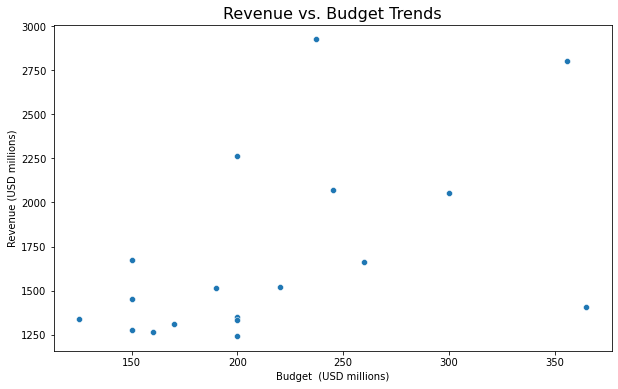

In [4199]:
# lineplot of Revenue vs. Budget Trends
plt.figure(figsize=(10, 6))
sns.scatterplot(data=reordered_df, x='budget_musd', y='revenue_musd')

# Adding title and labels
plt.title('Revenue vs. Budget Trends', fontsize=16)
plt.xlabel('Budget  (USD millions)')
plt.ylabel('Revenue (USD millions)')

plt.show()

- ROI Distribution by Genre

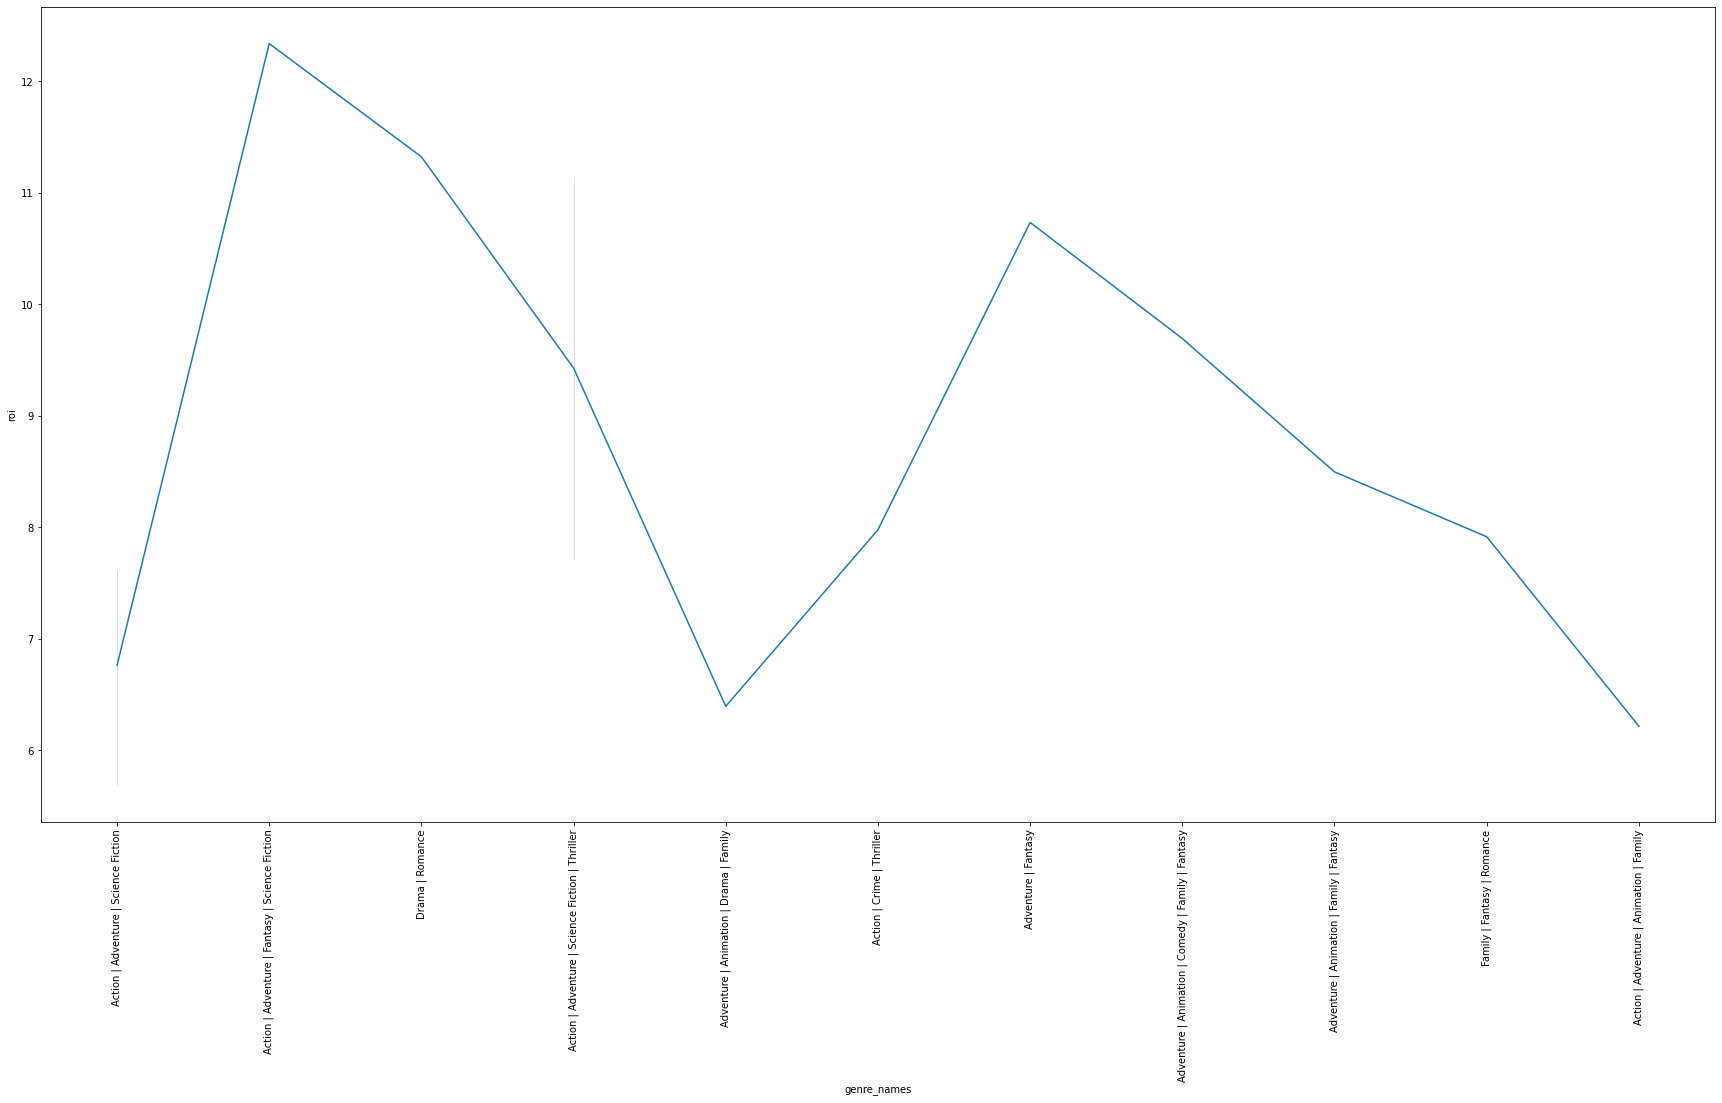

In [4200]:
# df['franchise'] = df['franchise'].astype(str)
plt.figure(figsize=(30, 15))
sns.lineplot(x = 'genre_names', y = 'roi', data = reordered_df)
plt.xticks(rotation=90)
plt.show()



- Popularity vs. Rating

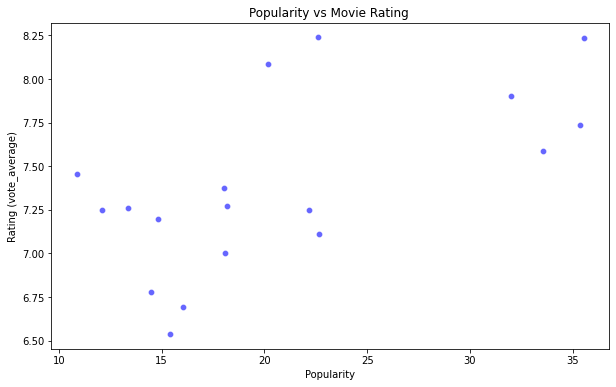

In [4201]:
# Scatter plot of Rating vs Popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='popularity', y='vote_average', alpha=0.6, color='blue')

# Adding title and labels
plt.title('Popularity vs Movie Rating ')
plt.xlabel('Popularity')
plt.ylabel('Rating (vote_average)')

plt.show()


- Yearly Trends in Box Office Performance

/var/folders/4r/wjm49txx4vj1j_kryh7ps6r00000gn/T/ipykernel_53279/1642237193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reordered_df['release_year'] = reordered_df['release_date'].dt.year
No handles with labels found to put in legend.


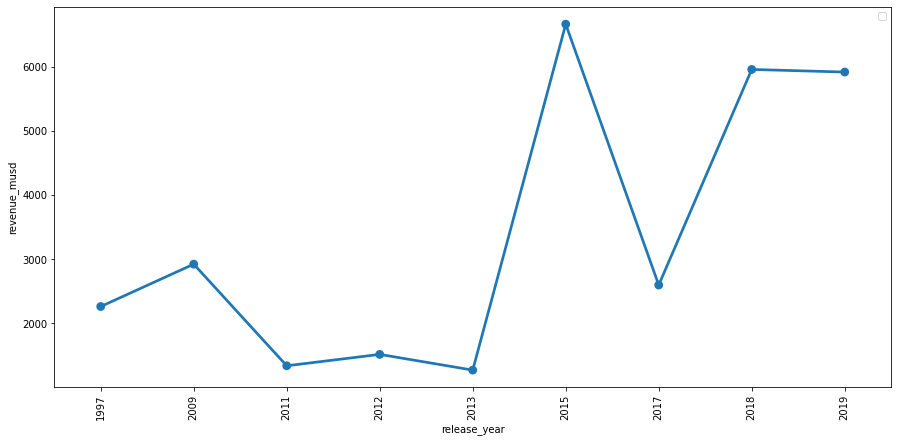

In [4202]:
# Add hue parameter to the pointplot to plot for each state
reordered_df['release_year'] = reordered_df['release_date'].dt.year
plt.figure(figsize=(15, 7)) # To resize the plot
yearly_df = reordered_df.groupby('release_year').agg({
        'revenue_musd': 'sum',
        'budget_musd': 'sum'
    }).reset_index()
sns.pointplot(x='release_year', y='revenue_musd', data=yearly_df)
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.show()

- Comparison of Franchise vs. Standalone Success

<Figure size 720x432 with 0 Axes>

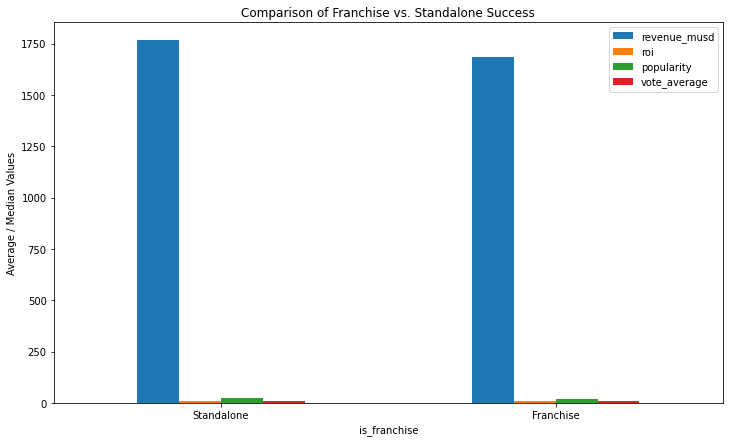

In [4203]:
plt.figure(figsize=(10, 6))
franchise_group = reordered_df.groupby('is_franchise').agg({
        'revenue_musd': 'mean',
        'roi': 'median',
        'popularity': 'mean',
        'vote_average': 'mean'
}).reset_index()

franchise_group['is_franchise'] = franchise_group['is_franchise'].map({True: 'Franchise', False: 'Standalone'})
franchise_group.set_index('is_franchise', inplace=True)
franchise_group.plot(kind='bar', figsize=(12, 7))
plt.title('Comparison of Franchise vs. Standalone Success')
plt.ylabel('Average / Median Values')
plt.xticks(rotation=0)
plt.show()
